# HOML Ch.14 Exercise 10

### Exercise: Use transfer learning for large image classification, going through these steps:

### Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).
### Split it into a training set, a validation set, and a test set.
### Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.
### Fine-tune a pretrained model on this dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
# Random seeds from both numpy and tensorflow
from numpy.random import seed
seed(99)
tf.random.set_seed(99)

We'll be working with a dataset that contains 10 different types of monkey species. It can be found on Kaggle: https://www.kaggle.com/slothkong/10-monkey-species

The dataset is relatively small with 825 training images and 272 images for both the validation and test sets. So, it's likely that overfitting will be a problem.

Since we're using Google Colab, and the dataset is loaded onto Drive, we have to mount the dataset from the Drive account.

In [4]:
# Mount Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To display the images we'll create a dictionary of each class and its filepath and cycle through them with a for loop.

In [5]:
# Dictionay of each class and its filepath
monk_dict = {'mantled_howler': '/content/drive/MyDrive/monkey_classification/training/n0_mantled_howler',
            'patas_monkey': '/content/drive/MyDrive/monkey_classification/training/n1_patas_monkey',
            'bald_uakari': '/content/drive/MyDrive/monkey_classification/training/n2_bald_uakari',
            'japanese_macaque': '/content/drive/MyDrive/monkey_classification/training/n3_japanese_macaque', 
            'pygmy_marmoset': '/content/drive/MyDrive/monkey_classification/training/n4_pygmy_marmoset', 
            'white_headed_capuchin': '/content/drive/MyDrive/monkey_classification/training/n5_white_headed_capuchin', 
            'silvery_marmoset': '/content/drive/MyDrive/monkey_classification/training/n6_silvery_marmoset', 
            'common_squirrel_monkey': '/content/drive/MyDrive/monkey_classification/training/n7_common_squirrel_monkey',
            'black_headed_night_monkey': '/content/drive/MyDrive/monkey_classification/training/n8_black_headed_night_monkey', 
            'nilgiri_langur': '/content/drive/MyDrive/monkey_classification/training/n9_nilgiri_langur'  
            }

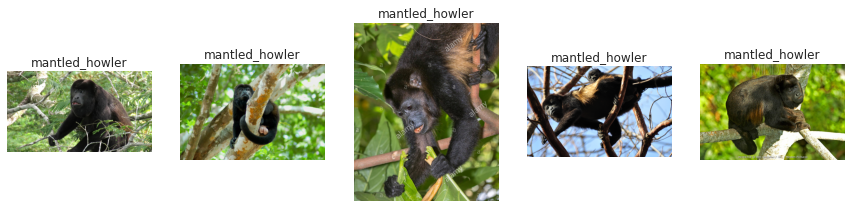

<Figure size 432x288 with 0 Axes>

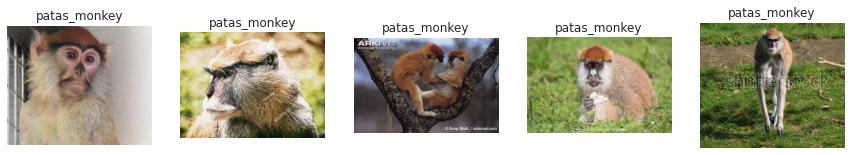

<Figure size 432x288 with 0 Axes>

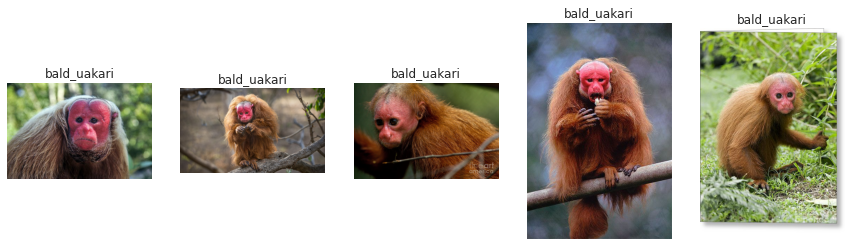

<Figure size 432x288 with 0 Axes>

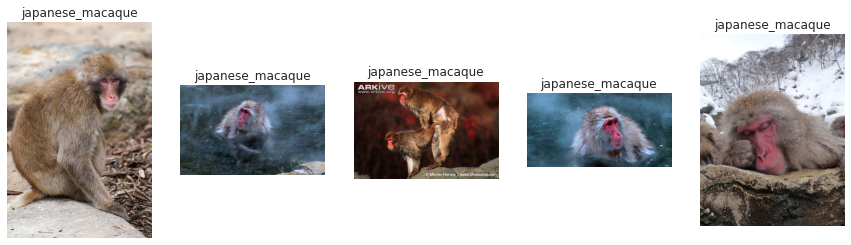

<Figure size 432x288 with 0 Axes>

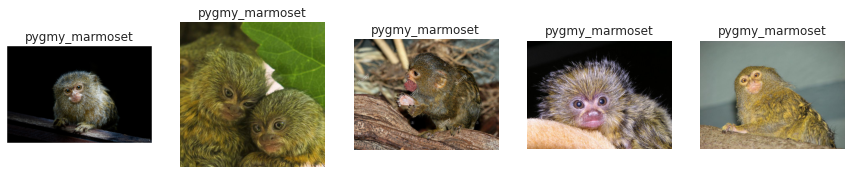

<Figure size 432x288 with 0 Axes>

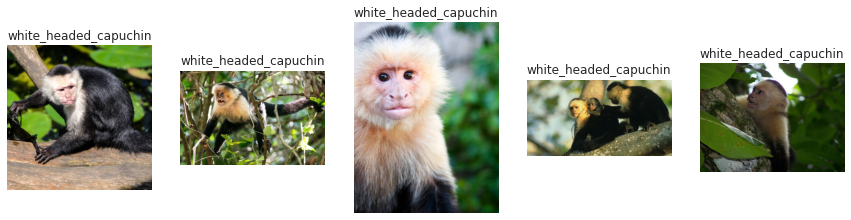

<Figure size 432x288 with 0 Axes>

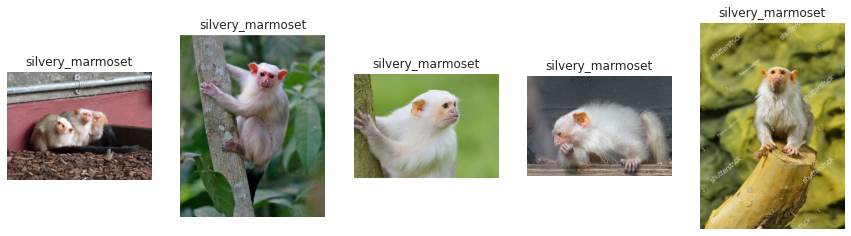

<Figure size 432x288 with 0 Axes>

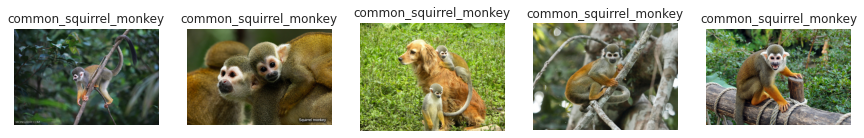

<Figure size 432x288 with 0 Axes>

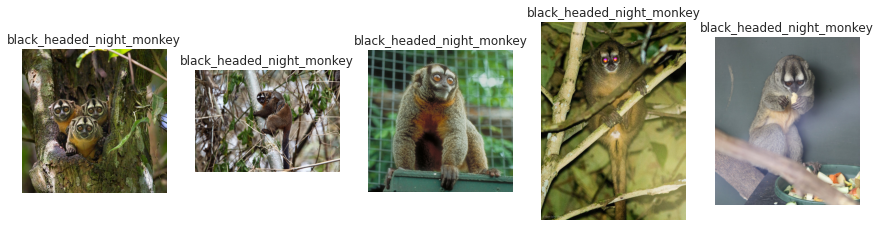

<Figure size 432x288 with 0 Axes>

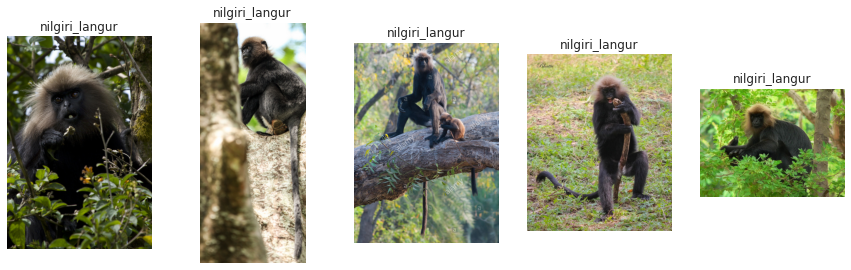

<Figure size 432x288 with 0 Axes>

In [6]:
# Display imagees of each class
for key, value in monk_dict.items():
  # Location of images
  path = value
  image_files = os.listdir(path)


  # Adjust the size of your images
  plt.figure(figsize=(15,15))


    # Select and display random images
  for i in range(5):
    plt.subplot(3, 5, i + 1)
    img = plt.imread(os.path.join(path, image_files[random.randrange(0, len(image_files))]))
    plt.title(key)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
  plt.show()
    
    
  # Adjust subplot parameters to give specified padding
  plt.tight_layout()

Looking at the images, we can see both commonalities and differences between the species. Two species have dark fur - mantled howler and nilgiri langur. The japanese macaque and bald uakari both have reddish faces, though the facial structures are different. The black headed night monkey has the largest eyes, while the silvery marmoset is the only species with entirely white fur. Thus, there are features that could cause the model confusion, yet there are also features that clearly distinguish the species from one another. 

In [7]:
# Import ImageDataGenerator to allow us to create batches and perform data augmentation
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Rescale the images
train_data_generator = ImageDataGenerator(rescale=1./255)
valid_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [9]:
# Paths to access the correct image folders
train_path = '/content/drive/MyDrive/monkey_classification/training'
valid_path = '/content/drive/MyDrive/monkey_classification/validation'
test_path = '/content/drive/MyDrive/monkey_classification/test'

In [10]:
train_batches = train_data_generator.flow_from_directory(train_path,
                                                                   target_size=(224, 224), 
                                                                   classes=['n0_mantled_howler', 'n1_patas_monkey', 'n2_bald_uakari',
                                                                            'n3_japanese_macaque', 'n4_pygmy_marmoset', 'n5_white_headed_capuchin', 
                                                                            'n6_silvery_marmoset', 'n7_common_squirrel_monkey', 'n8_black_headed_night_monkey', 
                                                                            'n9_nilgiri_langur'], 
                                                                   batch_size=32)
valid_batches = valid_data_generator.flow_from_directory(valid_path,
                                                        target_size=(224, 224), 
                                                        classes=['n0_mantled_howler', 'n1_patas_monkey', 'n2_bald_uakari',
                                                                            'n3_japanese_macaque', 'n4_pygmy_marmoset', 'n5_white_headed_capuchin', 
                                                                            'n6_silvery_marmoset', 'n7_common_squirrel_monkey', 'n8_black_headed_night_monkey', 
                                                                            'n9_nilgiri_langur'], 
                                                        batch_size=32)

test_batches = test_data_generator.flow_from_directory(test_path, 
                                                        target_size=(224, 224), 
                                                        classes=['n0_mantled_howler', 'n1_patas_monkey', 'n2_bald_uakari',
                                                                            'n3_japanese_macaque', 'n4_pygmy_marmoset', 'n5_white_headed_capuchin', 
                                                                            'n6_silvery_marmoset', 'n7_common_squirrel_monkey', 'n8_black_headed_night_monkey', 
                                                                            'n9_nilgiri_langur'], 
                                                        batch_size=32)

Found 825 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [11]:
# Function to graph training and validation accuracy/loss results
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.figure(figsize=(15, 7))
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

To save time we'll only be testing two pretrained models - InceptionV3 and InceptionResNetV2. The only real justification for choosing them is that they've done better than other pretrained models that we've worked with on previous datasets. 

A brief comparison of the two models can be found here: https://ai.googleblog.com/2016/08/improving-inception-and-image.html

Essentially, InceptionResnetV2 simplifies the architechture of InceptionV3 while also borrowing ideas from ResNet models.

In [20]:
# Load the model
iv3 = tf.keras.applications.InceptionV3(
                  include_top=False,
                  input_shape=(224, 224, 3))

We're adding a softmax Dense layer with 10 units to account for our 10 classes. We'll also add an additional ReLU Dense layer and a Flatten layer to convert the shape from the Inception layers to allow it to transfer to the Dense layers.

We should also note that we had used Dropout and Batch Normalization layers at this stage in previous trials, but their additon resulted in decreased accuracy.

In [21]:
# Adjust several layers
model_iv3 = tf.keras.Sequential()
model_iv3.add(iv3)
model_iv3.add(tf.keras.layers.Flatten())
model_iv3.add(tf.keras.layers.Dense(256, activation='relu'))
model_iv3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
model_iv3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 34,912,810
Trainable params: 34,878,378
Non-trainable params: 34,432
_________________________________________________________________


We'll be using the Adam optimizer. We had ran trials, not shown here, with Nadam, but the accuracy was below that of Adam.

In [23]:
model_iv3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# fit/train the model using the images and labels

%%time

callbacks_list = [
    
    keras.callbacks.ModelCheckpoint(
        filepath='iv3.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.
# steps per epoch size of dataset/batchsize . 825/32
history = model_iv3.fit(train_batches, 
                    steps_per_epoch=26, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=9, 
                    epochs=15, 
                    verbose = 1)

Epoch 1/15
26/26 [==============================] - 35s 1s/step - loss: 7.0900 - accuracy: 0.1903 - val_loss: 273.7538 - val_accuracy: 0.1029

Epoch 00001: val_loss improved from inf to 273.75378, saving model to iv3.h5
Epoch 2/15
26/26 [==============================] - 28s 1s/step - loss: 2.2872 - accuracy: 0.2182 - val_loss: 6252.3594 - val_accuracy: 0.0956

Epoch 00002: val_loss did not improve from 273.75378
Epoch 3/15
26/26 [==============================] - 28s 1s/step - loss: 1.8705 - accuracy: 0.3539 - val_loss: 50.4283 - val_accuracy: 0.1029

Epoch 00003: val_loss improved from 273.75378 to 50.42833, saving model to iv3.h5
Epoch 4/15
26/26 [==============================] - 28s 1s/step - loss: 1.5379 - accuracy: 0.4630 - val_loss: 9.1854 - val_accuracy: 0.2684

Epoch 00004: val_loss improved from 50.42833 to 9.18541, saving model to iv3.h5
Epoch 5/15
26/26 [==============================] - 29s 1s/step - loss: 1.0167 - accuracy: 0.6570 - val_loss: 209.3863 - val_accuracy: 0.1

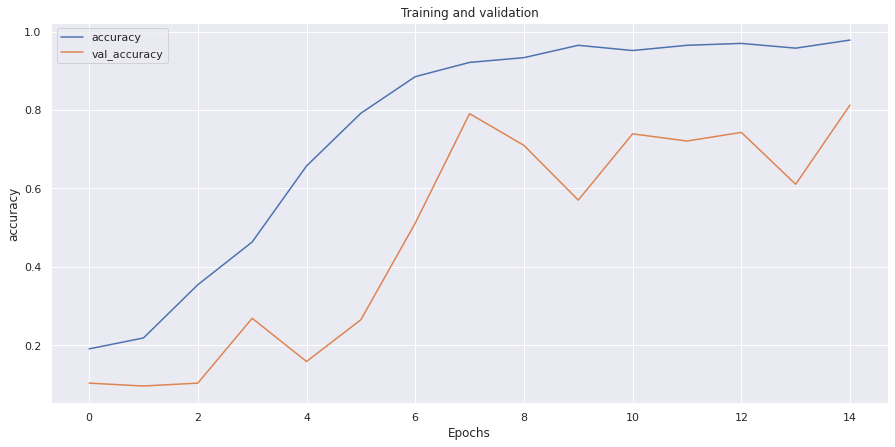

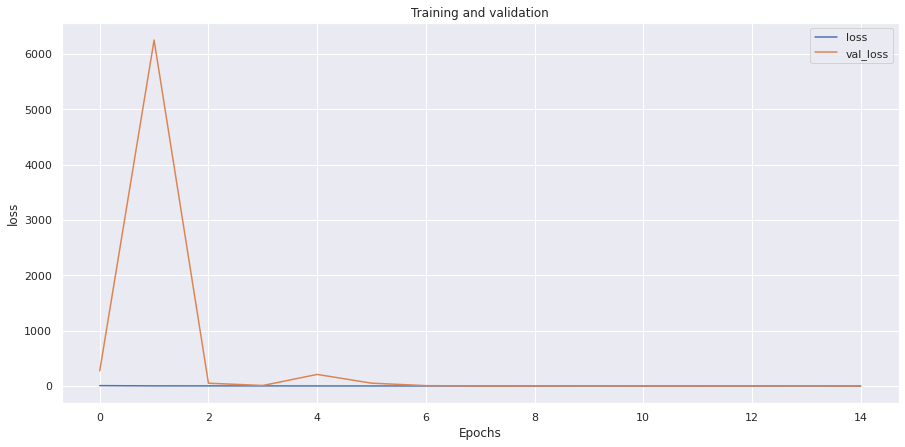

In [25]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
# Save the model
model_iv3.save("iv3_model")

INFO:tensorflow:Assets written to: iv3_model/assets


In [27]:
# restore the model and do some test set evaluation.
from tensorflow.keras.models import load_model
iv3_model = load_model('iv3_model')

In [28]:
# Runninng the model on the test set
test_loss, test_acc = iv3_model.evaluate(test_batches, steps=9)
print('test loss:', test_loss)
print('test acc:', test_acc)

9/9 [==============================] - 72s 9s/step - loss: 0.7149 - accuracy: 0.8346
test loss: 0.7148900032043457
test acc: 0.8345588445663452


We achieve a modest accuracy in the low 80's. As expected, there is a good deal of overfitting. Let's move next to InceptionResnetV2.

Before we can input the data to our next model, we need to change input size since InceptionResNetV2 defaults to 299 x 299.

In [29]:
train_batches_irnv2 = train_data_generator.flow_from_directory(train_path, 
                                                                   target_size=(299, 299), 
                                                                   classes=['n0_mantled_howler', 'n1_patas_monkey', 'n2_bald_uakari',
                                                                            'n3_japanese_macaque', 'n4_pygmy_marmoset', 'n5_white_headed_capuchin', 
                                                                            'n6_silvery_marmoset', 'n7_common_squirrel_monkey', 'n8_black_headed_night_monkey', 
                                                                            'n9_nilgiri_langur'], 
                                                                   batch_size=32)
valid_batches_irnv2 = valid_data_generator.flow_from_directory(valid_path, 
                                                        target_size=(299, 299), 
                                                        classes=['n0_mantled_howler', 'n1_patas_monkey', 'n2_bald_uakari',
                                                                            'n3_japanese_macaque', 'n4_pygmy_marmoset', 'n5_white_headed_capuchin', 
                                                                            'n6_silvery_marmoset', 'n7_common_squirrel_monkey', 'n8_black_headed_night_monkey', 
                                                                            'n9_nilgiri_langur'], 
                                                        batch_size=32)

test_batches_irnv2 = test_data_generator.flow_from_directory(test_path, 
                                                        target_size=(299, 299), 
                                                        classes=['n0_mantled_howler', 'n1_patas_monkey', 'n2_bald_uakari',
                                                                            'n3_japanese_macaque', 'n4_pygmy_marmoset', 'n5_white_headed_capuchin', 
                                                                            'n6_silvery_marmoset', 'n7_common_squirrel_monkey', 'n8_black_headed_night_monkey', 
                                                                            'n9_nilgiri_langur'], 
                                                        batch_size=32)

Found 825 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [30]:
irnv2 = tf.keras.applications.InceptionResNetV2(
                  include_top=False,
                  input_shape=(299, 299, 3))

219062272/219055592 [==============================] - 2s 0us/step


In [31]:
model_irnv2 = tf.keras.Sequential()
model_irnv2.add(irnv2)
model_irnv2.add(tf.keras.layers.Flatten())
model_irnv2.add(tf.keras.layers.Dense(256, activation='relu'))
model_irnv2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [32]:
model_irnv2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25166080  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 79,505,386
Trainable params: 79,444,842
Non-trainable params: 60,544
_________________________________________________________________


In [33]:
model_irnv2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
%%time

callbacks_list = [
    
    keras.callbacks.ModelCheckpoint(
        filepath='irnv2.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.
# steps per epoch size of dataset/batchsize . 825/32
history = model_irnv2.fit(train_batches_irnv2, 
                    steps_per_epoch=26, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches_irnv2, 
                    validation_steps=9, 
                    epochs=15, 
                    verbose = 1)

Epoch 1/15
26/26 [==============================] - 68s 2s/step - loss: 6.5900 - accuracy: 0.4182 - val_loss: 42.4527 - val_accuracy: 0.1250

Epoch 00001: val_loss improved from inf to 42.45273, saving model to irnv2.h5
Epoch 2/15
26/26 [==============================] - 39s 1s/step - loss: 1.4921 - accuracy: 0.6861 - val_loss: 10318.9893 - val_accuracy: 0.1434

Epoch 00002: val_loss did not improve from 42.45273
Epoch 3/15
26/26 [==============================] - 39s 1s/step - loss: 0.9476 - accuracy: 0.8594 - val_loss: 275.9764 - val_accuracy: 0.1213

Epoch 00003: val_loss did not improve from 42.45273
Epoch 4/15
26/26 [==============================] - 39s 1s/step - loss: 1.0676 - accuracy: 0.8255 - val_loss: 4687.3892 - val_accuracy: 0.1066

Epoch 00004: val_loss did not improve from 42.45273
Epoch 5/15
26/26 [==============================] - 40s 2s/step - loss: 0.3259 - accuracy: 0.9200 - val_loss: 315.4519 - val_accuracy: 0.1066

Epoch 00005: val_loss did not improve from 42.452

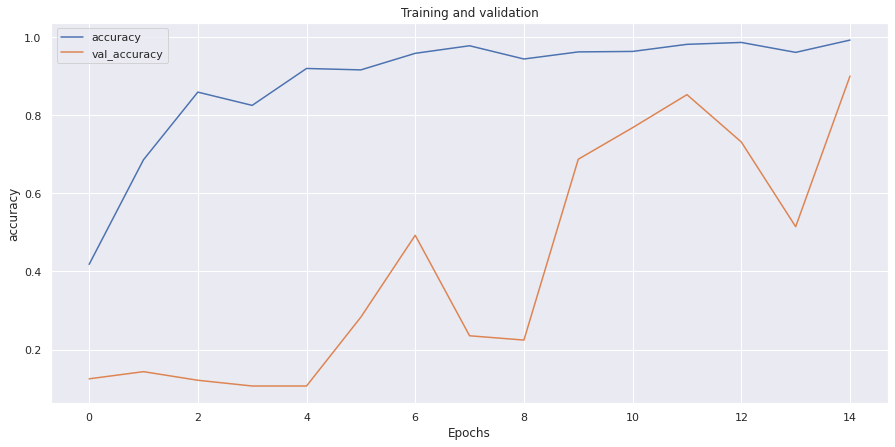

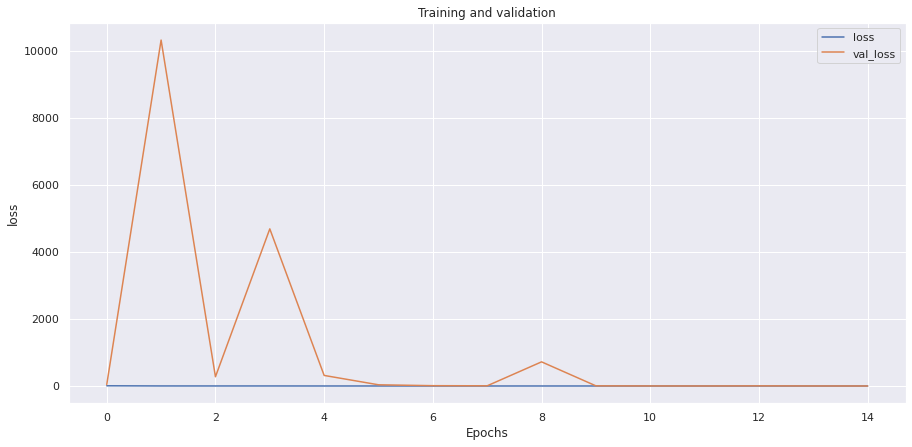

In [35]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [36]:
# Save the model
model_irnv2.save("irnv2.h5")

In [37]:
# restore the model and do some test set evaluation.
from tensorflow.keras.models import load_model
irnv2_model = load_model('irnv2.h5')

In [38]:
# Running the model on the test set
test_loss, test_acc = irnv2_model.evaluate(test_batches_irnv2, steps=9)
print('test loss:', test_loss)
print('test acc:', test_acc)

9/9 [==============================] - 9s 720ms/step - loss: 0.7445 - accuracy: 0.8787
test loss: 0.7445061802864075
test acc: 0.8786764740943909


The InceptionResNetV2 model outperformed the InceptionV3 model with accuracy in the high 80's. However, as with the previous model, there is still a good amount of overfitting. 

Due to its higher accuracy, for the remainder of the exercise, we'll just be working with the InceptionResNetV2 model.

We'll now try data (image) augmentation to both reduce overfitting and to potentially increase the accuracy. There are many hyperparameters that can be tuned. We'll only be tuning a few of them (tuning additonal hyperparameters in previous trials resulted in no noticable increase in accuracy). We'll rotate the images randomly up to 45 degrees, randomly zoom in up to 50%, randomly increase the brighness, and apply a horizontal flip. 

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [39]:
# Rescale the images
train_data_generator = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45,
                                   zoom_range=0.5,
                                   brightness_range=(1, 10),
                                   horizontal_flip=True, 
                                   fill_mode='nearest')
valid_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [40]:
irnv2_2 = tf.keras.applications.InceptionResNetV2(
                  include_top=False,
                  input_shape=(299, 299, 3))

In [41]:
model_irnv2_2 = tf.keras.Sequential()
model_irnv2_2.add(irnv2_2)
model_irnv2_2.add(tf.keras.layers.Flatten())
model_irnv2_2.add(tf.keras.layers.Dense(256, activation='relu'))
model_irnv2_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [42]:
model_irnv2_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
%%time

callbacks_list = [
    
    keras.callbacks.ModelCheckpoint(
        filepath='irnv2_2.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.
# steps per epoch size of dataset/batchsize . 825/32
history = model_irnv2_2.fit(train_batches_irnv2, 
                    steps_per_epoch=26, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches_irnv2, 
                    validation_steps=9, 
                    epochs=15, 
                    verbose = 1)

Epoch 1/15
26/26 [==============================] - 56s 2s/step - loss: 8.9286 - accuracy: 0.1188 - val_loss: 1417248.3750 - val_accuracy: 0.1140

Epoch 00001: val_loss improved from inf to 1417248.37500, saving model to irnv2_2.h5
Epoch 2/15
26/26 [==============================] - 39s 1s/step - loss: 2.4023 - accuracy: 0.1212 - val_loss: 56.4972 - val_accuracy: 0.1140

Epoch 00002: val_loss improved from 1417248.37500 to 56.49718, saving model to irnv2_2.h5
Epoch 3/15
26/26 [==============================] - 38s 1s/step - loss: 2.2239 - accuracy: 0.2000 - val_loss: 35.0428 - val_accuracy: 0.1066

Epoch 00003: val_loss improved from 56.49718 to 35.04275, saving model to irnv2_2.h5
Epoch 4/15
26/26 [==============================] - 39s 1s/step - loss: 1.9599 - accuracy: 0.3224 - val_loss: 6.4080 - val_accuracy: 0.2500

Epoch 00004: val_loss improved from 35.04275 to 6.40800, saving model to irnv2_2.h5
Epoch 5/15
26/26 [==============================] - 39s 1s/step - loss: 1.3293 - acc

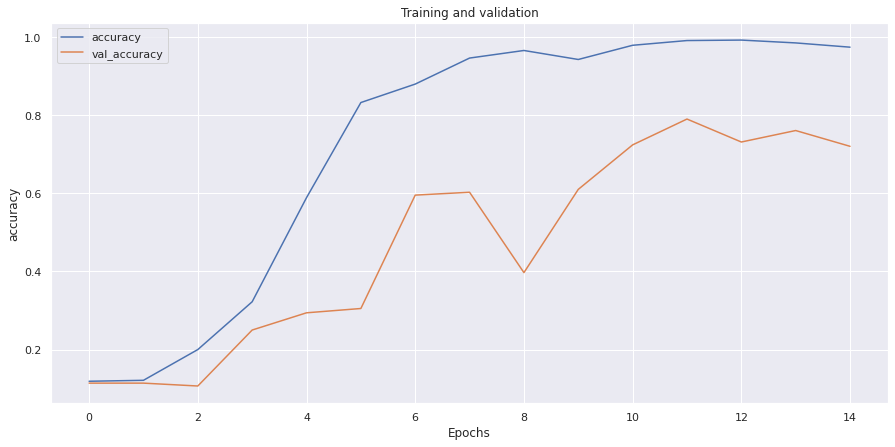

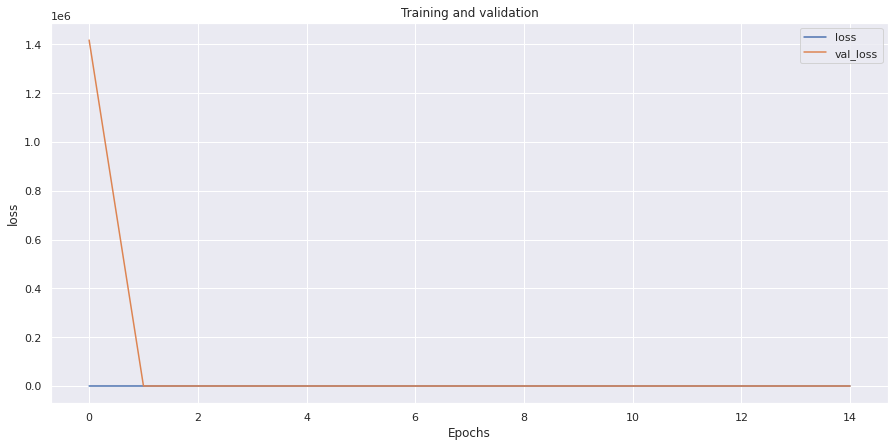

In [44]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [45]:
# Save the model
model_irnv2_2.save("irnv2_2.h5")

In [46]:
# restore the model and do some test set evaluation.
from tensorflow.keras.models import load_model
irnv2_2_model = load_model('irnv2_2.h5')

In [47]:
# Running the model on the test set
test_loss, test_acc = irnv2_2_model.evaluate(test_batches_irnv2, steps=9)
print('test loss:', test_loss)
print('test acc:', test_acc)

9/9 [==============================] - 9s 655ms/step - loss: 1.6892 - accuracy: 0.7206
test loss: 1.6892054080963135
test acc: 0.720588207244873


Applying data augmentation actually results in a significant decrease in accuracy as well as greater overfitting. Let's try one other appraoch to increasing our accuracy - finding an optimal learning rate. We'll use ReduceLRonPlateau as part of our callbacks to find where the validation loss is at its lowest.

In [51]:
keras.backend.clear_session()
tf.random.set_seed(999)
np.random.seed(999)

In [53]:
irnv2 = tf.keras.applications.InceptionResNetV2(
                  include_top=False,
                  input_shape=(299, 299, 3))

In [54]:
model_irnv2 = tf.keras.Sequential()
model_irnv2.add(irnv2)
model_irnv2.add(tf.keras.layers.Flatten())
model_irnv2.add(tf.keras.layers.Dense(256, activation='relu'))
model_irnv2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [56]:
# Applying learning rate scheduler to callbacks

%%time

callbacks_list = [
    
    keras.callbacks.ModelCheckpoint(
        filepath='irnv2.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ), 
    keras.callbacks.ReduceLROnPlateau(
        factor=0.3, patience=3)
]

model = model_irnv2

model_irnv2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

n_epochs = 25

history = model_irnv2.fit(train_batches_irnv2, 
                    steps_per_epoch=26, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches_irnv2, 
                    validation_steps=9, 
                    epochs=n_epochs, 
                    verbose = 1)

Epoch 1/25
26/26 [==============================] - 58s 2s/step - loss: 6.9366 - accuracy: 0.2679 - val_loss: 978.5293 - val_accuracy: 0.1029

Epoch 00001: val_loss improved from inf to 978.52930, saving model to irnv2.h5
Epoch 2/25
26/26 [==============================] - 39s 2s/step - loss: 1.6061 - accuracy: 0.5552 - val_loss: 462.8658 - val_accuracy: 0.1507

Epoch 00002: val_loss improved from 978.52930 to 462.86581, saving model to irnv2.h5
Epoch 3/25
26/26 [==============================] - 39s 1s/step - loss: 0.8801 - accuracy: 0.7927 - val_loss: 217.1713 - val_accuracy: 0.0956

Epoch 00003: val_loss improved from 462.86581 to 217.17131, saving model to irnv2.h5
Epoch 4/25
26/26 [==============================] - 39s 1s/step - loss: 0.5870 - accuracy: 0.8691 - val_loss: 241.0020 - val_accuracy: 0.0993

Epoch 00004: val_loss did not improve from 217.17131
Epoch 5/25
26/26 [==============================] - 38s 1s/step - loss: 0.5205 - accuracy: 0.8982 - val_loss: 22.2545 - val_ac

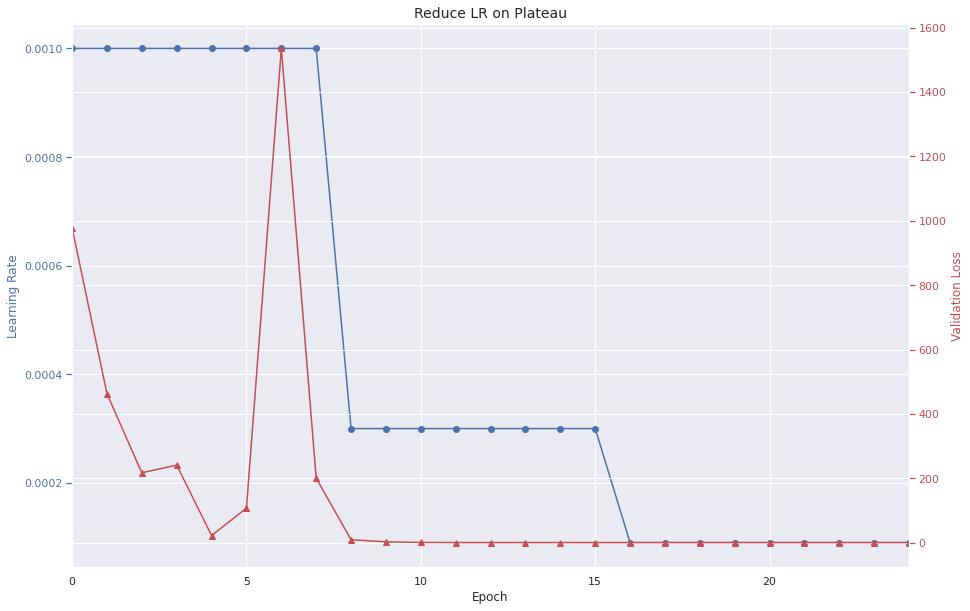

In [57]:
# Graph learning rate scheduler results
plt.figure(figsize=(15, 10))
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

It seems that a learning rate of 0.0003 results in the lowest validation loss. Let's apply that to our model.  

In [58]:
keras.backend.clear_session()
tf.random.set_seed(999)
np.random.seed(999)

In [59]:
irnv2 = tf.keras.applications.InceptionResNetV2(
                  include_top=False,
                  input_shape=(299, 299, 3))

In [60]:
model_irnv2 = tf.keras.Sequential()
model_irnv2.add(irnv2)
model_irnv2.add(tf.keras.layers.Flatten())
model_irnv2.add(tf.keras.layers.Dense(256, activation='relu'))
model_irnv2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [62]:
model_irnv2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
%%time

callbacks_list = [
    
    keras.callbacks.ModelCheckpoint(
        filepath='irnv2.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.
# steps per epoch size of dataset/batchsize . 825/32
history = model_irnv2.fit(train_batches_irnv2, 
                    steps_per_epoch=26, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches_irnv2, 
                    validation_steps=9, 
                    epochs=25, 
                    verbose = 1)

Epoch 1/25
26/26 [==============================] - 86s 2s/step - loss: 2.5377 - accuracy: 0.7261 - val_loss: 4.4333 - val_accuracy: 0.7169

Epoch 00001: val_loss improved from inf to 4.43332, saving model to irnv2.h5
Epoch 2/25
26/26 [==============================] - 39s 1s/step - loss: 0.3254 - accuracy: 0.9321 - val_loss: 0.7454 - val_accuracy: 0.9228

Epoch 00002: val_loss improved from 4.43332 to 0.74536, saving model to irnv2.h5
Epoch 3/25
26/26 [==============================] - 39s 1s/step - loss: 0.1021 - accuracy: 0.9685 - val_loss: 0.2420 - val_accuracy: 0.9632

Epoch 00003: val_loss improved from 0.74536 to 0.24204, saving model to irnv2.h5
Epoch 4/25
26/26 [==============================] - 39s 1s/step - loss: 0.0616 - accuracy: 0.9855 - val_loss: 0.4338 - val_accuracy: 0.9375

Epoch 00004: val_loss did not improve from 0.24204
Epoch 5/25
26/26 [==============================] - 39s 1s/step - loss: 0.0441 - accuracy: 0.9879 - val_loss: 0.6133 - val_accuracy: 0.9265

Epoch

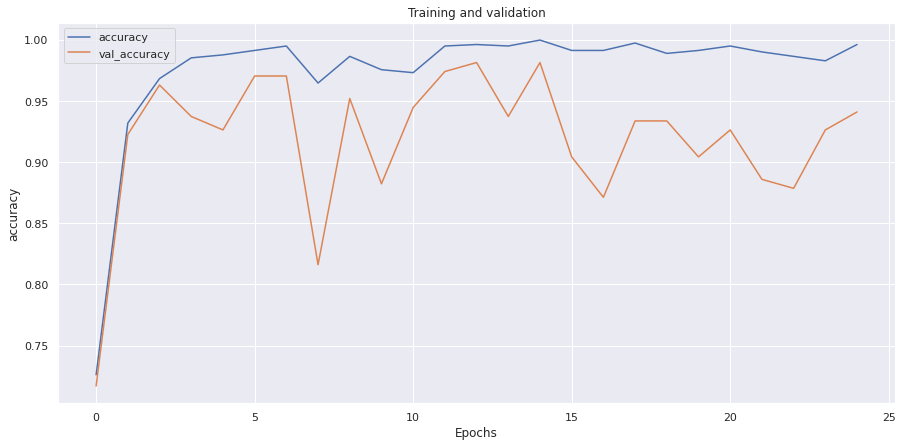

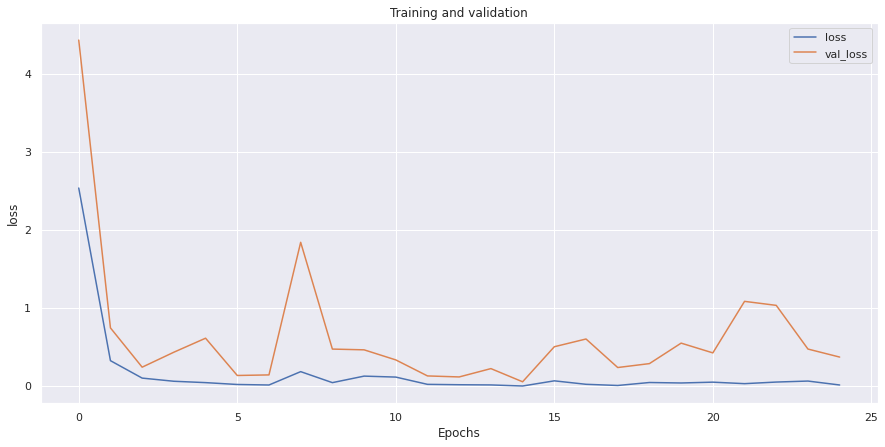

In [64]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [65]:
# Save the model
model_irnv2.save("irnv2.h5")

In [66]:
# restore the model and do some test set evaluation.
from tensorflow.keras.models import load_model
irnv2_model = load_model('irnv2.h5')

In [67]:
# Running the model on the test set
test_loss, test_acc = irnv2_model.evaluate(test_batches_irnv2, steps=9)
print('test loss:', test_loss)
print('test acc:', test_acc)

9/9 [==============================] - 9s 623ms/step - loss: 0.1927 - accuracy: 0.9596
test loss: 0.19271425902843475
test acc: 0.9595588445663452


Surprisingly, changing the learning rate results in a significant increase in accuracy to the high 90's. While there is still a good deal of overfitting, for the sake of time, we'll stop here. 

However, there are other approaches we can try in future to improve accuracy and/or overfitting- freezing some of the layers of the pretrained model, adding additonal layers before the output layer, as well as running the training for more epochs. 